In [21]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import sys 
sys.path.insert(1, "../")
from util import use_results, use_dataset, read_config, log_dataset

import seaborn as sns
sns.set_theme(style="whitegrid")

In [26]:
experiment = "ml-1m"
dataset_dir = use_dataset(experiment, download=False)
result_dir = use_results(experiment, download=True)

/Users/amitnarang/results_experiments/datasets/ml-1m


In [67]:
train_data = f"{dataset_dir}/train.csv"
train_df = pd.read_csv(train_data).sort_values('timestamp')
train_users = set(train_df["user_id"])

In [48]:
data = f"{dataset_dir}/stream.csv"
temp_df = pd.read_csv(data).sort_values('timestamp')

In [56]:
temp_df.groupby(["user_id"]).min().sort_values('timestamp')

,movie_id,rating,timestamp
user_id,,,
4269,32,1,965302637
4271,1,1,965302648
4268,5,1,965302662
4274,150,1,965302697
4267,910,1,965303020
...,...,...,...
5198,32,1,1041611007
5657,2,3,1041645957
5635,60,1,1043563388


In [59]:
user_examine = 5950

In [57]:
temp_df[temp_df['user_id'] == 5950]

,user_id,movie_id,rating,timestamp
734090,5950,1127,4,1046367898
734102,5950,413,1,1046367898
734084,5950,3070,1,1046367899
734085,5950,2439,4,1046367899
734111,5950,3363,5,1046367948
734107,5950,2329,5,1046367948
734110,5950,111,5,1046368241
734086,5950,2804,4,1046368263
734089,5950,2859,4,1046368290
734088,5950,2858,3,1046368290


In [106]:
policies_analyze = ["total_error_cold", "total_error", "min_past"]
ts_analyze = [100]
u_analyze = []

cold_df = pd.read_csv(f"{result_dir}/total_error_cold_1_100_results.csv").sort_values("timestamp")
cold_df = cold_df[~cold_df['user_id'].isin(train_users)]
te_df = pd.read_csv(f"{result_dir}/total_error_1_100_results.csv").sort_values("timestamp")
te_df = te_df[~te_df['user_id'].isin(train_users)]
mp_df = pd.read_csv(f"{result_dir}/min_past_1_100_results.csv").sort_values("timestamp")
mp_df = mp_df[~mp_df['user_id'].isin(train_users)]

'''
for t in ts_factor:
    for u in updates_per_ts:
        for p in policies_analyze:
            update_df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_updates.csv")
            df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
            df["policy"] = p
            df["updates"] = u 
            df["ts_factor"] = t
            
            strip_old_users = df[~df['user_id'].isin(train_users)]
            #rounded_pred = df.y_pred.apply(round_pred)
            #df["round"] = rounded_pred
            
            print(p)
            narrow_df = strip_old_users[['user_id', 'y_true', 'y_pred']]
            print(narrow_df)'''
overall_df = cold_df[["user_id", "movie_id", "y_true"]]
overall_df["cold"] = cold_df["y_pred"]
overall_df["te"] = te_df["y_pred"]
overall_df["mp"] = mp_df["y_pred"]

overall_df["cold_round"] = overall_df["cold"].apply(round_pred)
overall_df["te_round"] = overall_df["te"].apply(round_pred)
overall_df["mp_round"] = overall_df["mp"].apply(round_pred)

mp_diff = mean_squared_error(overall_df["cold"], overall_df["mp"])
te_diff = mean_squared_error(overall_df["cold"], overall_df["te"])

mp_round_diff = mean_squared_error(overall_df["cold_round"], overall_df["mp_round"])
te_round_diff = mean_squared_error(overall_df["cold_round"], overall_df["te_round"])

print(mp_diff, te_diff, mp_round_diff, te_round_diff)
te_uneq = overall_df[overall_df["cold"] != overall_df['te']]
te_uneq["diff"] = te_uneq["cold"] - te_uneq["te"]
te_uneq["round_diff"] = te_uneq["cold_round"] - te_uneq["te_round"]
te_uneq.mean()

mp_uneq = overall_df[overall_df["cold"] != overall_df['mp']]
mp_uneq["diff"] = mp_uneq["cold"] - mp_uneq["mp"]
mp_uneq["round_diff"] = te_uneq["cold_round"] - te_uneq["mp_round"]
mp_uneq.max()

/var/folders/p5/zwk89rgd0cdf07_7k1wdqjgw0000gn/T/ipykernel_19865/4108400031.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_df["cold"] = cold_df["y_pred"]
/var/folders/p5/zwk89rgd0cdf07_7k1wdqjgw0000gn/T/ipykernel_19865/4108400031.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_df["te"] = te_df["y_pred"]


3.324906284104389e-06 0.5980860126335255 2.8854758530356204e-06 0.532004374930634


/var/folders/p5/zwk89rgd0cdf07_7k1wdqjgw0000gn/T/ipykernel_19865/4108400031.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_uneq["diff"] = te_uneq["cold"] - te_uneq["te"]
/var/folders/p5/zwk89rgd0cdf07_7k1wdqjgw0000gn/T/ipykernel_19865/4108400031.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_uneq["round_diff"] = te_uneq["cold_round"] - te_uneq["te_round"]
/var/folders/p5/zwk89rgd0cdf07_7k1wdqjgw0000gn/T/ipykernel_19865/4108400031.py:51: SettingWithCopyWarning: 
A value is trying to be set 

user_id       4318.000000
movie_id      3849.000000
y_true           5.000000
cold             6.864934
te               9.830508
mp               6.864814
cold_round       5.000000
te_round         5.000000
mp_round         5.000000
diff             0.390332
round_diff       0.088759
dtype: float64

In [27]:
updates_per_ts = [1, 2, 4]
ts_factor = [10, 100] #, 1000]
policies = ["total_error", "total_error_cold", "max_pending", "min_past", "round_robin"]#, "last_query"]

In [28]:
updates_df = pd.DataFrame()
df_all = pd.DataFrame()
results = []

def round_pred(x):
    if x > 5:
        return 5
    if x < 0:
        return 0
    return x

for p in policies: 
    for u in updates_per_ts: 
        for t in ts_factor: 
            update_df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_updates.csv")
            df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
            df["policy"] = p
            df["updates"] = u 
            df["ts_factor"] = t
            
            rounded_pred = df.y_pred.apply(round_pred)
            
            scaled_amt = 5 / df.y_pred.max()
            scaled_pred = df.y_pred * scaled_amt
            
            error = mean_squared_error(df.y_pred, df.y_true)
            rounded_error = mean_squared_error(rounded_pred, df.y_true)
            scaled_error = mean_squared_error(scaled_pred, df.y_true)

            total_updates = len(update_df.index)
            results.append([u , p, error, rounded_error, scaled_error, total_updates, t])
            
            updates_df = pd.concat([updates_df, update_df])
            df_all = pd.concat([df_all, df])
      
results_df = pd.DataFrame(results, columns=["updates", "policy", "error", "round_error", "scaled_error", "total_updates", "ts_factor"])
results_df

,updates,policy,error,round_error,scaled_error,total_updates,ts_factor
0,1,total_error,1.242271,1.201570,10.010115,270020,10
1,1,total_error,1.923051,1.798480,10.673269,89396,100
2,2,total_error,1.229604,1.190995,10.006353,322673,10
3,2,total_error,1.543904,1.464845,10.102091,117557,100
4,4,total_error,1.227996,1.189622,10.005861,339250,10
5,4,total_error,1.400211,1.336729,10.058174,135767,100
6,1,total_error_cold,1.228774,1.189747,10.005837,270020,10
7,1,total_error_cold,1.525786,1.442181,10.564957,89396,100
8,2,total_error_cold,1.227965,1.189590,10.005849,322668,10
9,2,total_error_cold,1.358617,1.299033,10.044536,117540,100


# plot_df = results_df[(results_df["ts_factor"] == 100) & (results_df.policy.isin(["total_error_cold", "min_past", "round_robin", "max_pending", "last_query"]))]
plot_df.policy = plot_df.policy.map({
    'total_error_cold': 'Accuracy Optimized', 
    'min_past': 'Minimum Past Updates', 
    'round_robin': "Round-Robin", 
    'max_pending': "Maximum Pending Updates", 
    'last_query': "Read-Optimized"
})
plot_df = plot_df[plot_df["updates"] <=4]
print(plot_df)
#sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.barplot(x="updates", y="error", hue="policy", data=plot_df)
g.set(title="Prediction Accuracy per Policy (Recommendation)", xlabel="Updates per Timestep",  ylabel="MSE")

#plt.legend(np.flip(plot_df['policy'].unique()), loc='upper right', title="Event Type")

[Text(0.5, 1.0, 'Prediction Accuracy per Policy (Recommendation)'),
 Text(0.5, 0, 'Updates per Timestep'),
 Text(0, 0.5, 'Rounded MSE')]

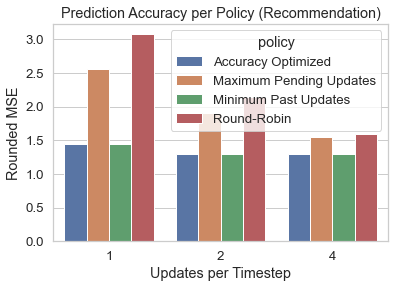

In [32]:

g1 = sns.barplot(x="updates", y="round_error", hue="policy", data=plot_df)
g1.set(title="Prediction Accuracy per Policy (Recommendation)", xlabel="Updates per Timestep",  ylabel="Rounded MSE")

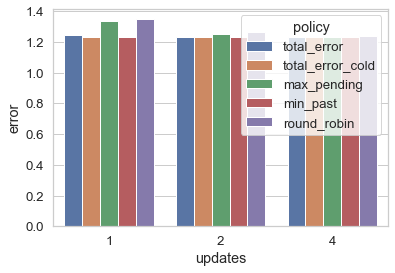

In [33]:
ax = sns.barplot(x="updates", y="error", hue="policy", data=results_df[results_df["ts_factor"] == 10])

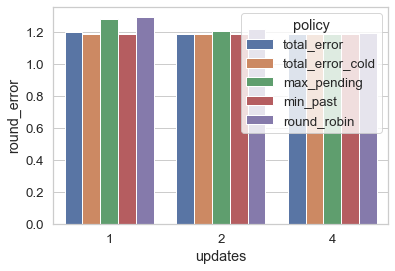

In [35]:
ax = sns.barplot(x="updates", y="round_error", hue="policy", data=results_df[results_df["ts_factor"] == 10])

In [38]:
temp_df = results_df[results_df["ts_factor"] == 10]

In [41]:
temp_df[temp_df['round_error'] == temp_df['round_error'].min()]

,updates,policy,error,round_error,scaled_error,total_updates,ts_factor
10,4,total_error_cold,1.227961,1.189589,10.005852,339250,10


In [37]:
plot_df[plot_df['policy'] == "Minimum Past Updates"]

,updates,policy,error,round_error,scaled_error,total_updates,ts_factor
19,1,Minimum Past Updates,1.557352,1.447356,12.041175,89396,100
21,2,Minimum Past Updates,1.367932,1.301233,10.521990,117322,100
23,4,Minimum Past Updates,1.347614,1.289921,10.041411,135451,100


In [ ]:
runtime = 1.0
sns.set(rc={'figure.figsize':(10.7,5.27)})
hist_df = updates_df[updates_df["runtime"] == runtime].groupby(by=["key", "policy"]).size()
hist_df = hist_df.to_frame(name="updates").reset_index()
hist_df["policy"] = hist_df.policy.map({'total_error': 'Accuracy Optimized', 'min_past': 'Minimum Past Updates'})

sns.set_theme(style="whitegrid", font_scale=1.5)
g = sns.histplot(data=hist_df, x="updates", hue="policy", log_scale=(False, True), discrete=True)
g.set(title="Distribution of Updates Across Keys", xlabel="Scheduled Updates per Key",  ylabel="Number Keys")

In [ ]:
updates_df[(updates_df["policy"] == "total_error") & (updates_df["runtime"] == 1.00)]

# Plot Dataset

In [ ]:
factor = 100

In [ ]:
test_df = pd.read_csv(f'{dataset_dir}/stream.csv')
train_df = pd.read_csv(f'{dataset_dir}/train.csv')
start_ts = test_df.timestamp.min()
test_df.timestamp = test_df.timestamp.apply(lambda ts: int((ts - start_ts)/factor))

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().plot() #.rolling(window=100).mean().plot()

In [ ]:
test_df.groupby(by="timestamp").count().plot()#.rolling(window=100).mean().plot()

In [ ]:
train_df.movie_id.value_counts()

In [ ]:
test_df.movie_id.value_counts()

# Results Over Time 

In [ ]:
results[0]

In [ ]:
x0 = test_df.timestamp.min()
x1 = test_df.timestamp.max()

p = "max_pending"
u = 1
t = 100
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
#df.groupby(by="timestamp").square_error.mean().rolling(1000).mean().plot(xlim=(x0, x1))

p = "total_error_cold"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p)


p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()

p = "max_pending"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()

p = "round_robin"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()



df

In [ ]:
p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df[df["y_pred"] > 10]

In [ ]:
x0 = test_df.timestamp.min()
x1 = 1000 #100000


p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().rolling(1).mean().plot(xlim=(x0, x1), label=p).legend()


In [ ]:
p = "total_error_cold"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().rolling(1).mean().plot(xlim=(x0, x1), label=p).legend()
#df[df["square_error"] > 100]

In [ ]:
import pickle

movie_features = pickle.load(open(f"{result_dir}/train_movie_features.pkl", "rb"))
user_features = pickle.load(open(f"{result_dir}/train_user_features.pkl", "rb"))
past_updates = pickle.load(open(f"{result_dir}/past_updates.pkl", "rb"))

In [ ]:
from workloads.recsys.stream_als import  predict_user_movie_rating

In [ ]:
movie_features[481][-1]

In [ ]:
predict_user_movie_rating(user_features[4312], movie_features[481])

In [ ]:
train_df[train_df["movie_id"] == 481]

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().rolling(window=1000).mean().plot()

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().plot(xlim=(x0, x1))

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().rolling(window=1000).mean().plot(xlim=(x0, x1))

In [ ]:
test_df.groupby(by="timestamp").count().plot(xlim=(x0, x1))#.rolling(window=100).mean().plot()

In [ ]:
test_df.groupby(by="timestamp").count().rolling(window=1).mean().plot(xlim=(x0, x1))